In [1]:
# Information Gain for x1, x2, and x3:
#    First we will start with entropy for x1 for which there are three options, hot, cool, and mild:
#    -(4/14)log2(4/14) - (4/14)log2(4/14) - (6/14)log2(6/14) = 1.5567
#    Then for x2, we have two options, weak and strong:
#    -(8/14)log2(8/14) - (6/14)log2(6/14) = 0.9852
#    And, for x3, we have two options, long and short:
#    -(7/14)log2(7/14) - (7/14)log2(7/14) = 1
#
#   Entropy for x1, hot, results in 2 nos and 2 yeses from the target variable:
#   -(2/4)log2(2/4)- (2/4)log2(2/4) =  1
#   Entropy for x1, mild, results in 2 nos and 4 yeses:
#   -(2/6)log2(2/6) - (4/6)log(4/6) = 0.918333
#   Entropy for x2, cool, results in 1 no and 3 yeses:
#   -(1/4)log2(1/4) - (3/4)log(3/4) = 0.81125
#   Hence the information gain for x1 is: 
#   1.5567 - [(4/14)*1+ (6/14)*0.918333+ (4/14)*0.81125] = 0.64563
#
#   Entropy of x2, weak, results in 2 nos and 6 yeses from the target variable:
#   -(2/8)log2(2/8) - (6/8)log2(6/8) = 0.81125
#   Entropy of x2, strong results in 3 nos and 3 yeses:
#   -(3/6)log2(3/6) - (3/6)log2(3/6) = 1
#   Hence the information gain for x2 is: 
#   0.9852 - [(8/14)*0.81125 +(6/14)*1] = 0.093057
#
#   Lastly, x3, long, results in 4 nos and 3 yeses from the target variable:
#   -(3/7)log2(3/7) - (4/7)log2(4/7)  = 0.985257
#   And, x3, short, results in 6 yes and 1 no, so we have:
#   (-6/7)log2(6/7) - (1/7)log2(6/7) = 0.591686
#   So the information gain of x3 is: 
#   1 - [(7/14)*0.985257 + (7/14)*0.591686] = 0.211529

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from fuzzytree import FuzzyDecisionTreeClassifier
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
data = pd.read_excel("C:/Users/Tara/Documents/A_GCU/DSC-540/Data.xlsx")
print(data)

    Temperature  Wind  Traffic_Jam Car_Driving
0             2     0            1           N
1             2     1            1           N
2             2     0            1           Y
3             0     0            1           Y
4             1     0            0           Y
5             1     1            0           N
6             1     1            0           Y
7             0     0            1           N
8             1     0            0           Y
9             0     0            0           Y
10            0     1            0           Y
11            0     1            1           Y
12            2     0            0           Y
13            0     1            1           N


In [6]:
# Though this dataset is very small, we will split the data between test and 
# training data per the instructions such  that Car_Driving is the target variable.
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['Car_Driving'])
X = data.drop(['Car_Driving'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
# CART Model for training data
clf = DecisionTreeClassifier(random_state=0, max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

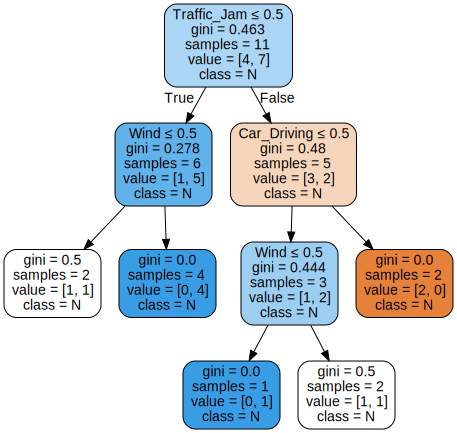

In [7]:
# Create visual of decision tree
dot_data = tree.export_graphviz(clf, 
                                feature_names = data.columns[1:],  
                                class_names = data["Car_Driving"],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [8]:
# The root mode starts the tree and is colored light blue. The Decison
# node is colored peach and light blue, with the 
# leaf/terminal nodes colored in orange, white, and darker blue.

# The minimum value of the Gini Index is 0 which happens when a node is pure, or
# when all the contained elements in the node are of one unique class. Therefore, 
# the node will not be split again. We can see that we have not reached this in 
# the decision tree not all of the leaves resulted in a gini of 0. 
# This is because the data we have cannot be 100% purely be classified into 
# groups which have similar traits as the data has inconsitencies. 

# This code begins by finding the information gain of x1, x2, and x3 by 
# applying the information gain formula that involves find the entropy for each
# varaible. The varaible with the highest information gain was x1 which means that 
# we removed the most entropy from this varaible, which is ideal. Then, we split
# the data into 80% training data, 20% testing data and created a decision tree from 
# the split data. The decision tree resulted in six final leaves, with gini impurity of 
# zero. 

In [9]:
# A decision tree consists of if/else-statements whose conditional expressions compare one or more 
# input variables with the individual properties defined for a given variable type. 
# In the fuzzy logic literature, each property defines a fuzzy set and an associated membership function 
# is used to determine the membership (truth value in the range 0 to 1) of given value of a linguistic 
# variable with respect to that property. The if/else-bodies can again contain other rules or contain 
# output variable assignments. Again, only properties can be assigned to output variables. In contrast to
# the properties for input variables, output properties must deliver constant truth values in the range 0 
# to 1. x1 consists of three levels: cool, mild, and hot while x2 has two levels: weak and strong. Lastly,
# traffic-jam has two levels: short and long. The data is already in fuzzy form as instead of binary 
# options for levels, we have stratified options listed above.

# To choose the root node, we will begin by defining membership functions and implementing
# fuzzy rules, then build the model.

C:\Users\Tara\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tara\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tara\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Tara\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


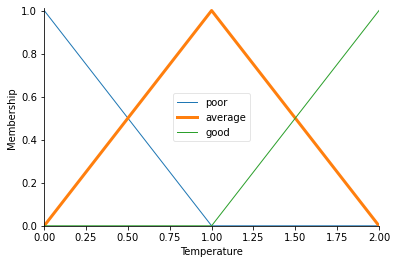

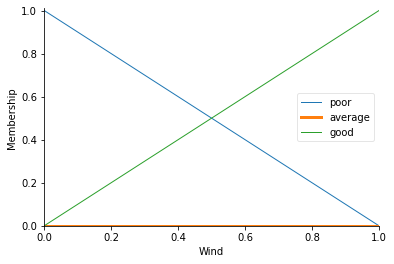

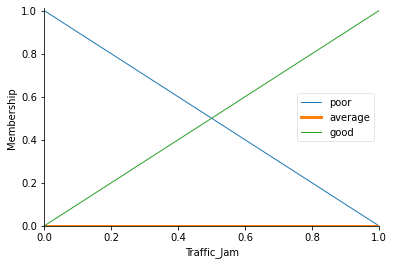

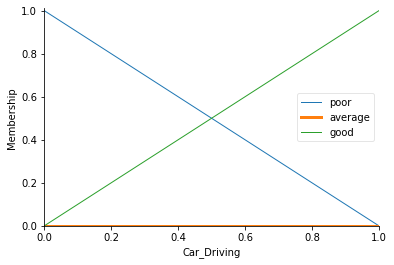

In [13]:
# Attempt #1 at Fuzzy Decision Tree with plots
# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp = ctrl.Antecedent(np.arange(0, 3, 1), 'Temperature')
wind = ctrl.Antecedent(np.arange(0, 2, 1), 'Wind')
traff = ctrl.Antecedent(np.arange(0, 2, 1), 'Traffic_Jam')
drive = ctrl.Consequent(np.arange(0, 2, 1), 'Car_Driving')

# Assigning ranges of numbers to values

temp['hot'] = fuzz.trimf(temp.universe, [1, 2, 2])
temp['mild'] = fuzz.trimf(temp.universe, [0, 0, 0])
temp['cool'] = fuzz.trimf(temp.universe, [2, 2, 3])

wind['strong'] = fuzz.trimf(wind.universe, [1, 1, 1])
wind['weak'] = fuzz.trimf(wind.universe, [0, 0, 0])

traff['long'] = fuzz.trimf(traff.universe, [1, 1, 1])
traff['short'] = fuzz.trimf(traff.universe, [0, 0, 0])

drive['yes'] = fuzz.trimf(drive.universe, [1, 1, 1])
drive['no'] = fuzz.trimf(drive.universe, [0, 0, 0])

# Auto-membership function population 

temp.automf(3)
wind.automf(3)
traff.automf(3)
drive.automf(3)

temp['average'].view()
wind['average'].view()
traff['average'].view()
drive['average'].view()

In [14]:
# Create Fuzzy rules
rule1 = ctrl.Rule(temp['poor'] | traff['poor'], drive['poor'])
# If temperature is poor or traffic is poor, then driving is poor.

drive_ctrl = ctrl.ControlSystem([rule1])
driving = ctrl.ControlSystemSimulation(drive_ctrl)

# Input values for all antecedents
driving.input['traff'] = 0
driving.input['temperature'] = 1
driving.input['wind'] = 0

# Crunch the numbers
driving.compute()
print (driving.output['drive'])
drive.view(sim=driving)

ValueError: Unexpected input: traff

In [15]:
# Attempt #2 at Fuzzy Decision Tree with plot
clf2 = FuzzyDecisionTreeClassifier()
clf2.fit(X_train, y_train)

# Create visual of decision tree
dot_data2 = tree.export_graphviz(clf2, 
                                feature_names = data[data.columns[[0, 1, 2]]],  
                                class_names = [data.columns[:-1]],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph2 = graphviz.Source(dot_data)  
graph2

ValueError: Length of feature_names, 14 does not match number of features, 3

In [16]:
# In the article attached, the authors study the quality of dried figs 
# by implementing machine learning and data mining. This includes a 
# combined decision tree-fuzzy logic (DT-FL) process to classify the 
# figs on their features. Within the DT_FL approach, the authors used 
# three different decision tree algorithms – J48 (C4.5 decision tree 
# learner), REP (reduced error puning), and LMT (logistic model trees)
# to classify the data (Banakar et al., 2017). After they defined 
# membership functions and implemented the fuzzy rule base by decision
# trees, they built the classification model using MATLAB. Lastly, 
# the authors evaluated their model by creating classification matrices,
# as well as other performance factors like classification specificity,
# root mean squared error, and correlation (Banakar et al., 2017). 
# The model with the best performance was the decision tree with REP 
# algorithm was the best classifier with 91.74% accuracy. These 
# findings can help other data scientists by giving good options for 
# their classification problems, as well as some background on how 
# these models performed with real world data.

In [17]:
# Resources:
#   Aznar, P. (2020, Feb 12). Decision Trees: Gini vs Entropy. Quant Dare. 
#   https://quantdare.com/decision-trees-gini-vs-entropy/  
#    
#   Banakar, A., Zareiforoush, H., Baigvand, M., Montazeri, M., Khodaei, J., & Behroozi‐Khazaei, N. 
#   (2017, June). Combined Application of Decision Tree and Fuzzy Logic Techniques for Intelligent Grading of Dried Figs.
#   Journal of Food Process Engineering, 40(3), 1-12.
#    
#   Fuzzy Control Systems: The Tipping Problem. (n.d.). Python Hosted.
#   https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html 
#
#   Plotting Fuzzy Decision Tree Classifier. (n.d.). FuzzyTree. 
#   https://balins.github.io/fuzzytree/auto_examples/plot_classifier.html#sphx-glr-auto-examples-plot-classifier-py 
#
#   Pranto, B. (2020, Jan 2). Entropy Calculation, Information Gain & Decision Tree Learning. Analytics Vidhya.
#   https://medium.com/analytics-vidhya/entropy-calculation-information-gain-decision-tree-learning-771325d16f 
#    
#   Zhou, V. (2019, June 7). A Simple Explanation of Information Gain and Entropy. VictorZhou.
#   https://victorzhou.com/blog/information-gain/ 